                                          理发店模拟程序报告
 
                                            2052972 张斯然
 

# 需求分析

模拟理发店运营：理发店内有K个理发师，有一把长椅用于顾客等待时使用，长椅最多可容纳L个人，顾客到店的时间随机，到店后如果等待位置已满顾客则会直

接离开，每位顾客的理发时间均不同（范围处于0-30内），理发店每天的开业时间（t_start）和闭店时间（t_end）可自由设定，开店时间前到达的顾客会直接

离开，到达闭店时间时新的客人无法进入，在等待位置的顾客也需要离开。

编写程序，功能要求：

1）每天开店时，可以输入K, L, t_start, t_end的具体数值

2）开店前，通过“新增顾客”选项，随机生成该顾客的到来时间以及理发耗时，模拟理发店经营情况，后增加的顾客到来时间不小于之前一个顾客的到来时间。

3）开店后，通过显示：

“顾客i到达，当前时间为x”

“顾客i离开，当前时间为x，完成理发/未完成理发”

“顾客i开始理发，当前时间为x”

“顾客i结束理发x，当前时间为x”

“顾客i完成理发，总耗时x”（包含等待时间）

几种状态模拟这一理发过程，在最后闭店时输出理发店全天总服务人数以及理发平均耗时。

4）输入数据形式：K, L, t_start, t_end，第i位顾客到达时间(〖t_arv〗_i)与理发时间(〖t_cut〗_i)均以整形数字表示。（例如K=10,L=6,t_start=0，t_end=500，〖t_arv〗_20=190,〖t_cut〗_20=25）

5）设计的程序要包含一个简单的界面实现，界面要求：有合理提示，上述每个功能可以设立菜单，根据提示可完成相关的功能要求。

测试数据：要求使用1、合法数据；2、非法数据。进行程序测试，以保证程序的稳定，测试数据及测试结果请在上交的资料中写明。



## 客人生成模块

目标：随机生成客人，客人三个属性：序号，到达时间与理发时间

随机生成到达时间与理发时间

每位顾客的理发时间均不同，生成在0-30之内的随机数。

对于整体，要求后一位顾客的到来时间不小于之前一个顾客的到来时间，这就要求记录时间的变量。

通过循环，不断生成客人，以到达时间超过闭店时间作为截止条件，终止客人的循环。

将所有客人以数组的形式进行储存。

## 理发师节点模块
将整体理发店作为列表进行监控，列表的每一个元素都是一个节点，本模块就是负责设计这些节点。

目标：设计理发师节点，实现一些基础的功能

包括：

1.反馈功能，即有人理发时返回1，没人理发时，返回0至总控信号模块

2.时间记录功能，记录理发时间并进行简单运算。

3.结束功能，理发结束后，返回当前时间进行更新，并清空节点。

4.节点清理功能，将理发结束的节点重置。

## 等待区设计模块
考虑使用数据结构中的队进行实现

需求目标是：

受到总控系统的信号后，执行入队或出队的操作

实现对于等待区满员后来的客人，直接送走的操作



## 总控信号系统模块
目标：实现总体控制，以此来实现不同的操作

包括理发店内和等待区两个地方的控制

想要实现实时进行更新监控，作为接收与发令模块对状态进行监控与反馈。

对于等待区监控系统，有空位返回信号0，无空位返回信号1

对于理发店内的监视系统，有空位返回信号0，无空位返回信号1

## 主程序启动模块

协调上述系统进行运作

## GUI模块（输入与输出模块）
GUI展示内容，用于输入，输出展示，总体统计模块也包含在内

总体统计展示实际服务人数与平均理发时间

# 概要设计与详细设计（源代码）

In [1]:
#一些基础的模块化设计
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import scrolledtext
waitlist=[]
lifadiansave=0
guest_amount=0
t_counter=0
t_jiange=0
t_counter=0
t_arrival_jiange=0
t_shengyu=0
t_wait=0
timesum=0
status=0
t_max=0
wait_signal=0
renshu=0
lifat=0

## 客人生成模块的相关设置
### 概要设计
1.预期使用数组对所有结果进行存储，三个属性合为一组，最终在python里存储为一个大的客人列表

2.单个客人生成器，预期实现每运行一次，生成一个客人，同时计数器进行计数，使得在生成下一个客人时，序号加一。

3.随机模块,使用numpy的random函数进行实现，在本模拟中，理发时间在0-30分钟，而客人到来的随机间隔调整为0-20分钟。

### 详细代码

In [2]:
#客人生成相关模块
def lifatime():#理发时间生成函数
    time= int(29*np.random.random())+1
    return time
def guest(guest_amount):#客人定义函数
    guesttotal=[]
    guest_name=guest_amount
    guesttotal.append(guest_name)
    guest_lifatime=lifatime()
    guesttotal.append(guest_lifatime)
    guest_arrivaltime=t_start+int(20*np.random.random())+1#定义客人到来的间隔是（0-20min）
    guesttotal.append(guest_arrivaltime)#将客人三个属性打包在一个列表中，作为数组进行储存
    return guesttotal
def guest_generator():#客人生成器
    global guest_amount
    guest_amount=guest_amount+1#每生成一个，下一个客人的序号自动+1
    guest_temp=guest(guest_amount)
    global t_start
    t_start=guest_temp[2]#保证下一个客人的到来时间在前一个客人之后
    return guest_temp

## 理发师节点模块设计
### 概要设计
预期使用 类 进行节点设计

定义Barber类作为节点

如果节点为空，返回0

如果节点有输入，返回1

重置就清空节点，用None进行覆写。

结束，返回结束时间，并在显示栏中进行显示，最后清空节点

### 详细代码

In [ ]:
class Barber:#理发店内理发师作为单独的节点进行编辑
    def __init__(self):
        self.guestname=None
        self.lifatime=None
        self.starttime=None
    def feedback(self):
        if self.guestname==None:
            return 0
        else:
            return 1
    def t_solver(self):
        if self.lifatime==None:
            return 0
        else:
            t_shengyu=self.lifatime
            return t_shengyu
    def reset(self):
        self.guestname=None
        self.lifatime=None
        self.starttime=None
    def end(self):
        endtime=self.starttime+self.lifatime
        scr1.insert(tk.INSERT,"顾客{}结束理发\n".format(self.guestname))
        scr1.insert(tk.INSERT,"当前时间为{}\n".format(endtime))
        global renshu
        global lifat
        renshu=renshu+1
        lifat=lifat+self.lifatime
        Barber.reset(self)
        Barber.feedback(self)
        return endtime 

## 等待区设计模块
### 概要设计
由总控系统发出信号进行控制：

客人到来：

判断等待区是否满员

等待区满员，直接送走

等待区有空余，执行入队操作

判断理发店是否有空余：

理发店有空余，执行出队操作

理发店没空余，显示开始等待

### 详细设计

In [4]:
def waitbench(a):#等待区模块
    if center_avasignal==0:#理发店内总控系统信号
        if len(waitlist)!=0:
            temp = waitlist[0]
            waitlist.pop(0)
            scr1.insert(tk.INSERT,"客人{}进入理发店\n".format(temp[0]))
            return temp
        else:
            return a
    if wait_signal==0:#等待区控制信号
        waitlist.append(a)
        if center_avasignal==1:
            scr1.insert(tk.INSERT,"理发店全员运转，客人开始等待\n".format(a[0]))
            global counter
            counter=counter+1
    if wait_signal==1:
        scr1.insert(tk.INSERT,"等待区域已经满员,客人{}未理发离开\n".format(a[0]))

## 总控信号系统模块
### 概要设计
1.对于理发店内的总控系统
理发店采用列用列表进行存储，采用三个列表用于主程序运算。

列表一：节点设置存储，根据输入，使用线性表存储节点。

列表二：用于状态监控，监控每一个节点的返回值，用以后续处理，同样使用线性表进行存储

列表三：时间存储器，用以存储每个节点的剩余时间，用于时间和状态的更新，同样使用线性表进行处理。

理发店内总控信号的检测：

对列表二进行处理，所有值相加，小于总节点数就说明理发店内有空位，发出有空余信号0

等于节点数，就说明理发店内没有空位，发出满员信号1

对于等待区的检测：

如果队伍全满，返回信号1

如果队伍有空，返回信号0


### 详细代码

In [6]:
# 理发店总控系统,总控系统初始化
t_counter=0
Barberstatus=[]#用于检测是否有空余节点
shoptime_solver=[]#用于时间的记录，并进行相关的计算
Barberlist=[]
def new():
    global Barberlist
    global shoptime_solver
    global Barberstatus
    for i in range(0,K):
        x=Barber()
        Barberlist.append(x)#列表一，储存节点
        y=x.t_solver()
        shoptime_solver.append(y)#列表二，时间运算
        z=x.feedback()
        Barberstatus.append(z)#列表三，状态监控
def fresh(i):#实时更新状态
    Barberstatus[i]=Barberlist[i].feedback()
    shoptime_solver[i]=Barberlist[i].t_solver()

In [3]:
#总控信号系统
def centercontrol():#理发店总控编辑，管理总的系统,负责指挥信号的发送
    global center_avasignal
    if sum(Barberstatus)<K:#理发店列表初始均为0,0表示有空,1表示占用，只要总和<K，说明有空
        center_avasignal=0
        scr1.insert(tk.INSERT,"目前理发店内有空位\n")
    if sum(Barberstatus)==K:
        center_avasignal=1
        scr1.insert(tk.INSERT,"目前理发店内没有空位\n")
def waitcontrol():#等待区控制系统，若有空位发送信号0，无空位发送信号1
    global wait_signal
    global have_signal#是否有人在等待
    if len(waitlist)<L:
        wait_signal=0
    if len(waitlist)==L:
        wait_signal=1
    if len(waitlist)!=0:
        have_signal=1
    else:
        heve_signal=0

## 主程序设计
### 概要设计
读取客人生成列表中的内容

进行相关操作

使用循环进行相关模拟，循环截止条件定位：读取完最后客人列表的最后一个客人，待理发店剩余客人理完发后结束

使用t_counter变量用于状态更新与时间记录

t_arrival_jiange用于记录前后两个客人到来的时间间隔

t_biaozhun用于记录时间记录列表的最小值

将两者进行比较，用于更新下一次的时间状态

当t_arrival_jiange>t_biaozhun,时间储存列表里所有的时间减去t_biaozhun，将减去后得到0的节点结束,更新状态，同时减小t_jiange

重复这个循环，直到到达间隔<t_biaozhun，结束循环，更新到来状态

对于每一个进入的客人，都先进行当前状态更新，然后进入等待区和理发区域的判定

之后为了解决到来之后，在下一次到来之前结束理发，新产生空位的问题

在状态更新后，在状态更新后再次进行上述判定

重复，直到理发店关门

### 详细过程

In [7]:
def start():
    global counter,biaozhun,chushi,have_signal,t_counter
    counter=0
    old_counter=-1
    chushi=guestsavelist[0]
    biaozhun=0
    have_signal=0
    if chushi[0]==1:
        t_counter=chushi[2]
    scr1.insert(tk.INSERT,"状态初始化，当前时间为：{}\n".format(t_counter))
    while True:
        if counter==len(guestsavelist):
            for i in range(0,len(Barberstatus)):
                if Barberstatus[i]!=0:
                    Barberlist[i].end()
            break
        guest=guestsavelist[counter]
        scr1.insert(tk.INSERT,"客人{}预期到达时间为{}\n".format(guest[0],guest[2]))
        #print("counter",counter)
        t_arrival_jiange=guest[2]-t_counter#新客人与前一位客人的到来间隔
        #print("t_arrival_jiange",t_arrival_jiange)
        t_shengyu=min(shoptime_solver)
        #print("t_shengyu",t_shengyu)
        templist=[]
        while True:
            for i in shoptime_solver:
                if i!=0:
                    templist.append(i)
            #print(templist)
            if(len(templist)!=0):
                biaozhun=min(templist)
            #print("标准",biaozhun)
            if t_arrival_jiange>=biaozhun and biaozhun!=0:
                for i in range(0,len(shoptime_solver)):
                    if Barberlist[i].feedback()==1:
                        shoptime_solver[i]=shoptime_solver[i]-biaozhun
                        if shoptime_solver[i]==0:
                            t_counter=Barberlist[i].end()
                            fresh(i)
                #print("状态更新中，当前时间为：",t_counter)
                t_arrival_jiange=t_arrival_jiange-biaozhun
                templist=[]
            elif biaozhun==0:
                break
            else:
                centercontrol()
                waitcontrol()
                if have_signal==0:
                    t_counter=guest[2]
                #print(have_signal)
                for i in range(0,len(shoptime_solver)):
                    if Barberlist[i].feedback()==1:
                        shoptime_solver[i]=shoptime_solver[i]-t_arrival_jiange
                break
        centercontrol()    
        waitcontrol()
        oldjudge=wait_signal
        a=waitbench(guest)
    
        for i in range(0,len(Barberlist)):
            if Barberlist[i].feedback()==0:
                Barberlist[i].guestname=a[0]
                Barberlist[i].lifatime=a[1]
                Barberlist[i].starttime=t_counter
                scr1.insert(tk.INSERT,"{}号客人开始理发\n".format(a[0]))
                scr1.insert(tk.INSERT,"当前时间为:{}\n".format(t_counter))
                scr1.insert(tk.INSERT,"理发师{}号为您服务。\n".format(i))
                scr1.insert(tk.INSERT,"预期理发时间为：{}\n".format(a[1]))
                temp=1
                #print(counter)
                fresh(i)
                break
        if wait_signal==1:#即等待区满员了，跳出当前循环
            counter=counter+1
            continue
        centercontrol()
        waitcontrol()
        if oldjudge==1 and wait_signal==0:
            a=waitbench(guest)
            for i in range(0,len(Barberlist)):
                if Barberlist[i].feedback()==0:
                    Barberlist[i].guestname=a[0]
                    Barberlist[i].lifatime=a[1]
                    Barberlist[i].starttime=t_counter
                    scr1.insert(tk.INSERT,"客人开始理发\n".format(a[0]))
                    scr1.insert(tk.INSERT,"当前时间为:{}\n".format(t_counter))
                    scr1.insert(tk.INSERT,"理发师{}号为您服务。\n".format(i))
                    scr1.insert(tk.INSERT,"预期理发时间为：{}\n".format(a[1]))
                    temp=1
                    #print(counter)
                    fresh(i)
                    break
        else:
            pass
    
        if temp==1:
            counter=counter+1
            #print(counter)
        elif t_counter>guest[2]:
            counter=counter+1
            #print(counter)
        temp=0
        scr1.insert(tk.INSERT,"  \n")

## GUI初始化模块
重置所有参数，以便进行下一次模拟

In [8]:
def new_start():
    global guestsavelist
    global waitlist
    global lifadiansave
    global guest_amount
    global t_counter
    global t_jiange
    global t_counter
    global t_arrival_jiange
    global t_shengyu
    global t_wait
    global timesum
    global status
    global t_max
    global wait_signal
    global t_counter
    global Barberstatus
    global shoptime_solver
    global Barberlist
    global renshu
    global lifat
    renshu=0
    lifat=0
    guestsavelist=[]
    waitlist=[]
    lifadiansave=0
    guest_amount=0
    t_counter=0
    t_jiange=0
    t_counter=0
    t_arrival_jiange=0
    t_shengyu=0
    t_wait=0
    timesum=0
    status=0
    t_max=0
    wait_signal=0
    t_counter = 0
    Barberstatus=[]#用于检测是否有空余节点
    shoptime_solver=[]#用于时间的记录，并进行相关的计算
    Barberlist=[]
    scr.delete(0.0,tk.END)
    scr1.delete(0.0,tk.END)
    messagebox.showwarning("通知","可以重新输入了")

## GUI编辑模块
主要用于GUI设计，输入，同时客人列表的生成函数也在这一模块之中

总体运营情况统计也在这一模块里面

In [9]:

root_window=tk.Tk()
root_window.title('大树十字坡理发店模拟器')
root_window.geometry('1500x1500')
scr = scrolledtext.ScrolledText(root_window, width=40, height=20,font=("宋体",18))  #滚动文本框（宽，高（这里的高应该是以行数为单位），字体样式）
scr.grid(row=16,column=0) #滚动文本框在页面的位置
scr1 = scrolledtext.ScrolledText(root_window, width=40, height=20,font=("宋体",18))  #滚动文本框（宽，高（这里的高应该是以行数为单位），字体样式）
scr1.grid(row=16,column=3) #滚动文本框在页面的位置
root_window["background"] = "white"
text=tk.Label(root_window,text="大树十字坡理发店模拟器",bg="white",fg="black",font=('Times', 20))
text.grid(row=0,column=2)
text1=tk.Label(root_window,text="客人情况显示器",bg="white",fg="black",font=('Times', 15))
text1.grid(row=15,column=0)
text2=tk.Label(root_window,text="运营情况显示器",bg="white",fg="black",font=('Times', 15))
text2.grid(row=15,column=3)
labe1 = tk.Label(root_window,text="请输入开门时间（整数）：",bg="white",fg="black")
labe2 = tk.Label(root_window,text="请输入关门时间（整数）：",bg="white",fg="black")
labe3 = tk.Label(root_window,text="请输入理发师人数（整数）：",bg="white",fg="black")
labe4 = tk.Label(root_window,text="请输入最大等待人数（整数）：",bg="white",fg="black")
labe1.grid(row=1)
labe2.grid(row=2)
labe3.grid(row=3)
labe4.grid(row=4)
type1=tk.IntVar()
type2=tk.IntVar()
type3=tk.IntVar()
type4=tk.IntVar()
entry1 = tk.Entry(root_window,textvariable=type1)
entry2 = tk.Entry(root_window,textvariable=type2)
entry3 = tk.Entry(root_window,textvariable=type3)
entry4 = tk.Entry(root_window,textvariable=type4)
entry1.grid(row=1, column=1)
entry2.grid(row=2, column=1)
entry3.grid(row=3, column=1)
entry4.grid(row=4, column=1)
def output1():
    output1=tk.Label(root_window,text="今天服务的理发人数为{}".format(renshu),bg="white",fg="black",font=('Times', 15))
    output1.grid(row=40,column=2)
    output2=tk.Label(root_window,text="今天服务的理发平局时间为为{}".format(lifat/renshu),bg="white",fg="black",font=('Times', 15))
    output2.grid(row=41,column=2)
def input1():
    global t_start
    global t_end
    global K
    global L
    try:
        t_start=int(entry1.get())
        t_end=int(entry2.get())
        K=int(entry3.get())
        L=int(entry4.get())
    except:
        messagebox.showwarning('警告','请输入大于0整数数字')
    if t_start<0 or t_end<t_start or K<0 or L<0:
        messagebox.showwarning('警告','请检查逻辑，输入大于0的整数数字')
    new()
def guiguest():
    global guestsavelist
    guestsavelist=[]
    scr.insert(tk.INSERT,"    客人开始生成     \n")
    while True:
        a=guest_generator()
        scr.insert(tk.INSERT,"顾客{}已经生成 \n".format(a[0]))
        scr.insert(tk.INSERT,"顾客预计理发时间为{}\n".format(a[1]))
        scr.insert(tk.INSERT,"顾客预计到达时间为{}\n".format(a[2]))
        scr.insert(tk.INSERT,"\n")
        if a[2]>t_end:#到来时间超过关门时间，停止客人的生成
            scr.insert(tk.INSERT,"客人{}到来时已经是关门时间,不能理发\n".format(a[0]))
            break
        guestsavelist.append(a)
tk.Button(root_window,text='输入确定',width=10,command=input1).grid(row=12,column=0,sticky=tk.W,padx=10,pady=5)
tk.Button(root_window,text='客人生成',width=10,command=guiguest).grid(row=12,column=1,sticky=tk.W,padx=10,pady=5)
tk.Button(root_window,text='开始运营',width=10,command=start).grid(row=12,column=2,sticky=tk.W,padx=10,pady=5)
tk.Button(root_window,text='重新启动',width=10,command=new_start).grid(row=12,column=3,sticky=tk.W,padx=10,pady=5)
tk.Button(root_window,text='今日小结',width=10,command=output1).grid(row=39,column=2,sticky=tk.W,padx=10,pady=5)
root_window.mainloop()#开启主循环，让窗口处于显示状态

# 调试分析
## 运行演示
运行exe文件

出现GUI图形界面

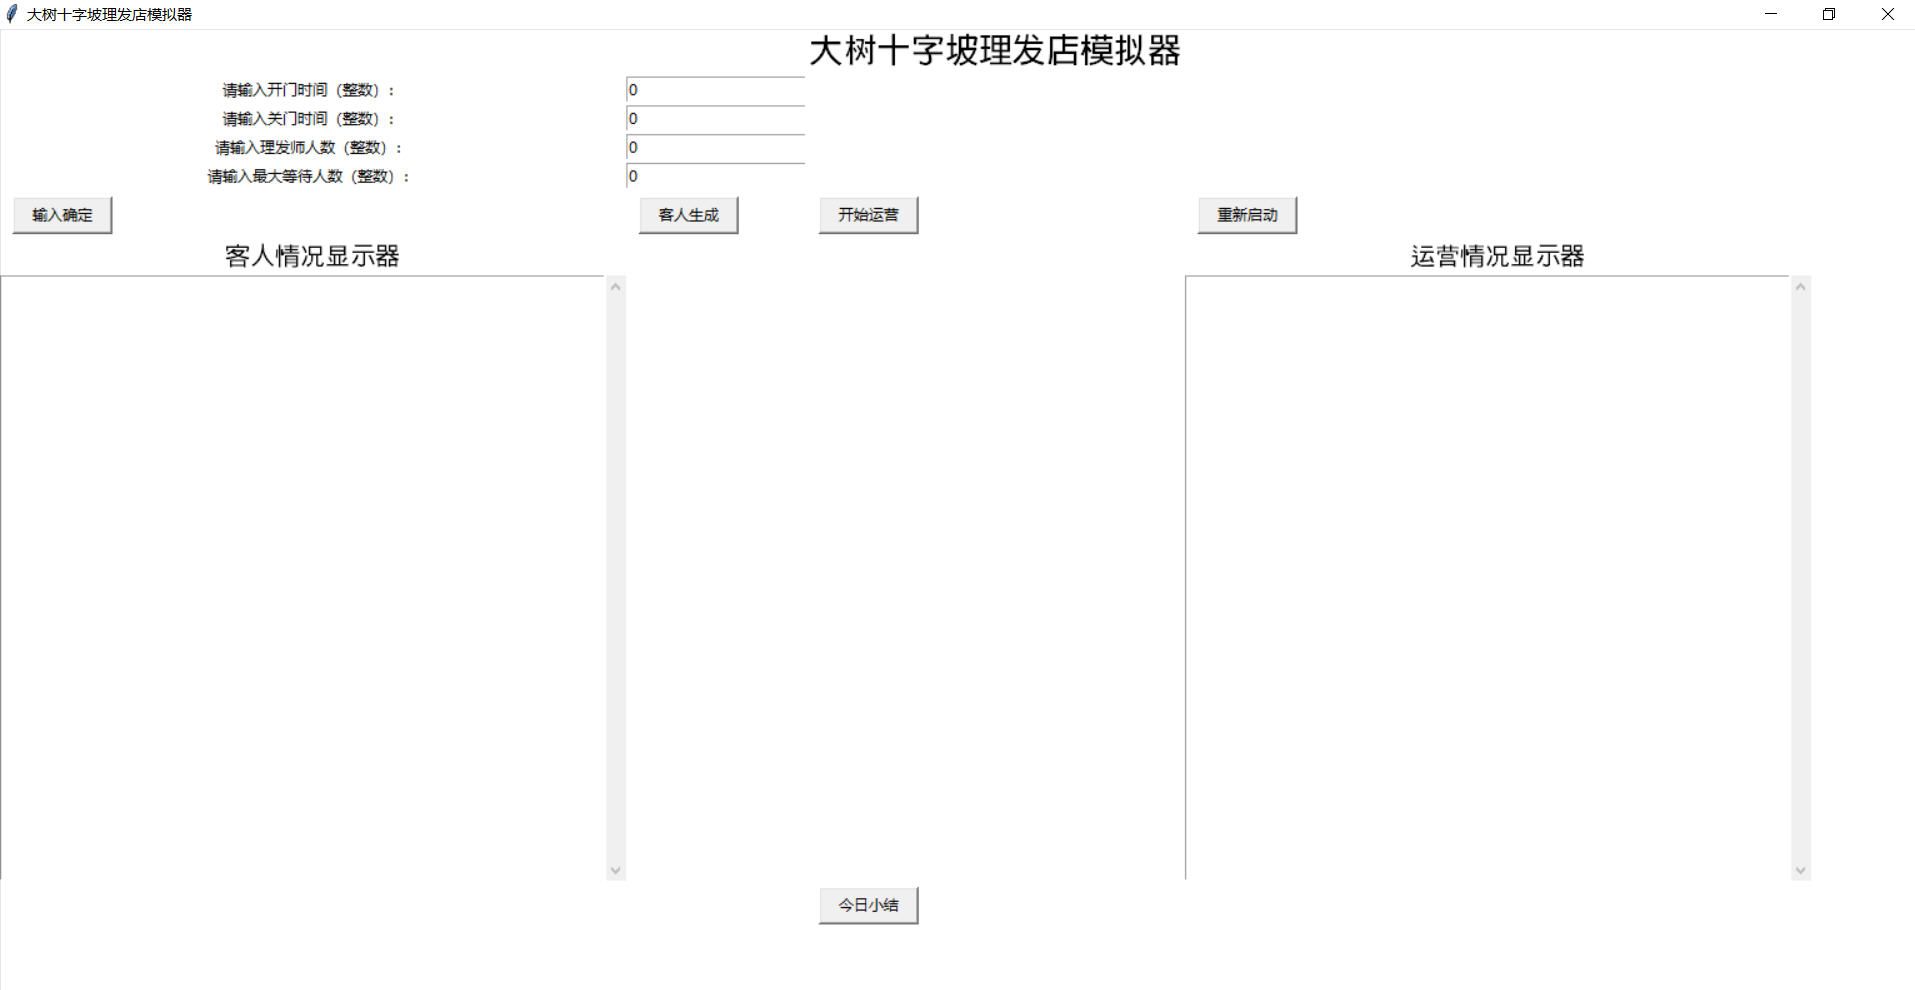

当有非正常输入时：

会进行弹窗警告




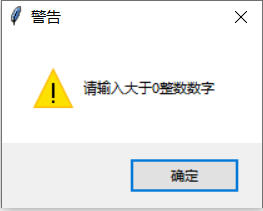

当输入数据为非法时，出现上图所示警告
当输入数据不符合逻辑时间，出现下图警告
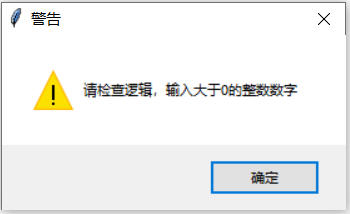

正常运行的截图显示
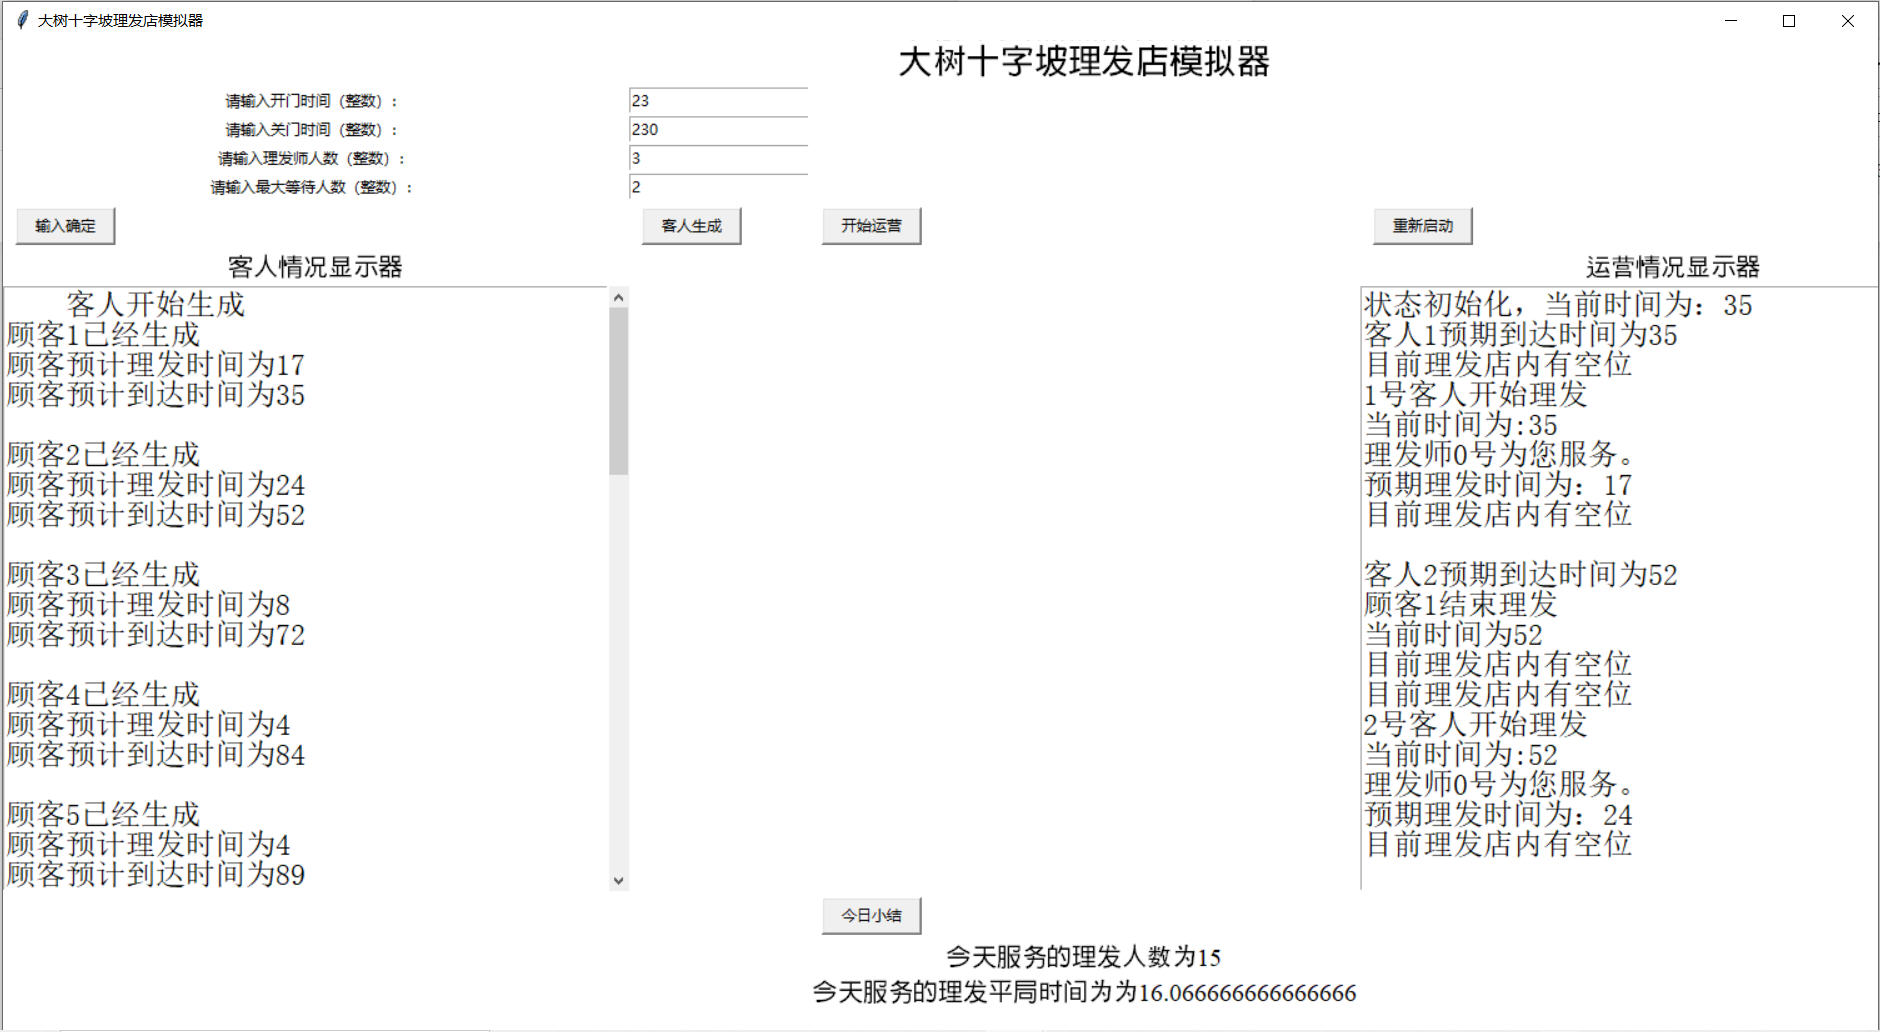

点击重新启动

可以进行重启，清空两个输出框，并初始化程序

## 相关分析

### 时间复杂度分析

时间复杂度主要集中再循环部分，具体循环次数是与具体数值挂钩

### 问题分析与解决

我觉得对我而言最困难的点还是在主程序的编写，如何将前面写的模块组合起来，才是最大的困难。

单一模块的编写并不复杂，但是要记住很多变量并最终组合有些困难

在编写主程序的时候，有时候还需要返回更改各个模块，使得时间和变量统一。

在主程序编写的时候，初始碰到的最大问题就是确定状态更新的时间分析，确定什么时候可以更新状态。

为此，原先还编写了状态更新模块，但是，由于状态更新模块没有起到作用，最终决定删除。

第二个主程序编写的问题就是，原先将客人生成放在主程序之中，采用一次循环，生成一个客人，但会出现时间倒流的bug

所以最终采用将生成客人的程序放在主程序段之外。

第三个主程序的问题在于若到来间隔大于剩余时间，不应该进入客人，而应该先理完发，再更新客人进入。

这个问题最终采取增加一个循环解决，在到达截止条件之前（到来间隔<最小剩余时间），优先处理理发的相关事务。

第四个问题在于若到来时间和结束理发时间相同，会出现一些小bug

解决方法是改变一些条件，将如>改为≥。

### 算法的优化思路

1.想办法将客人生成并入主循环，并清理掉处理过的客人，以节省空间。

2.优化时间判别，寻找更佳的状态更新方式。